In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv('./501.csv')

In [3]:
data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [23]:
data.tail()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
53896,00:23.9,-1.000000,-0.051758,0.078125,-0.956787,-0.064453,0.140625,6
1687,42:37.6,-0.890625,-0.015625,0.375000,-0.935059,0.002686,0.114258,6
1011,42:24.1,-0.921875,-0.048584,0.343994,-0.953125,-0.019775,0.109375,6
28676,51:56.9,-0.959961,-0.017578,0.227539,0.032959,-0.062500,-1.075928,7
102990,16:46.8,-0.750000,-0.062500,0.579590,-0.201416,-0.185791,-1.058350,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103860 entries, 0 to 103859
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  103860 non-null  object 
 1   back_x     103860 non-null  float64
 2   back_y     103860 non-null  float64
 3   back_z     103860 non-null  float64
 4   thigh_x    103860 non-null  float64
 5   thigh_y    103860 non-null  float64
 6   thigh_z    103860 non-null  float64
 7   label      103860 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 6.3+ MB


In [5]:
print('Invalid values in train = {}'.format(data.isnull().values.sum()))
data.isnull().sum()

Invalid values in train = 0


timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

C:\Users\procns\AppData\Local\Temp\ipykernel_17480\78737807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = data.corr()


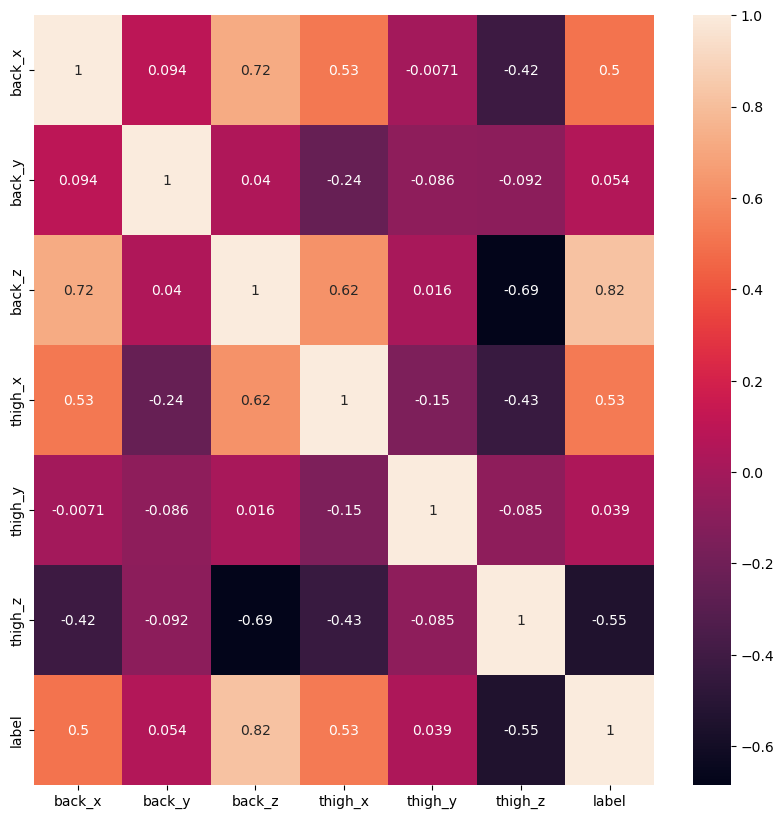

In [6]:
df_corr = data.corr()
plt.figure(figsize = (10,10))
#sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = True)
plt.show()

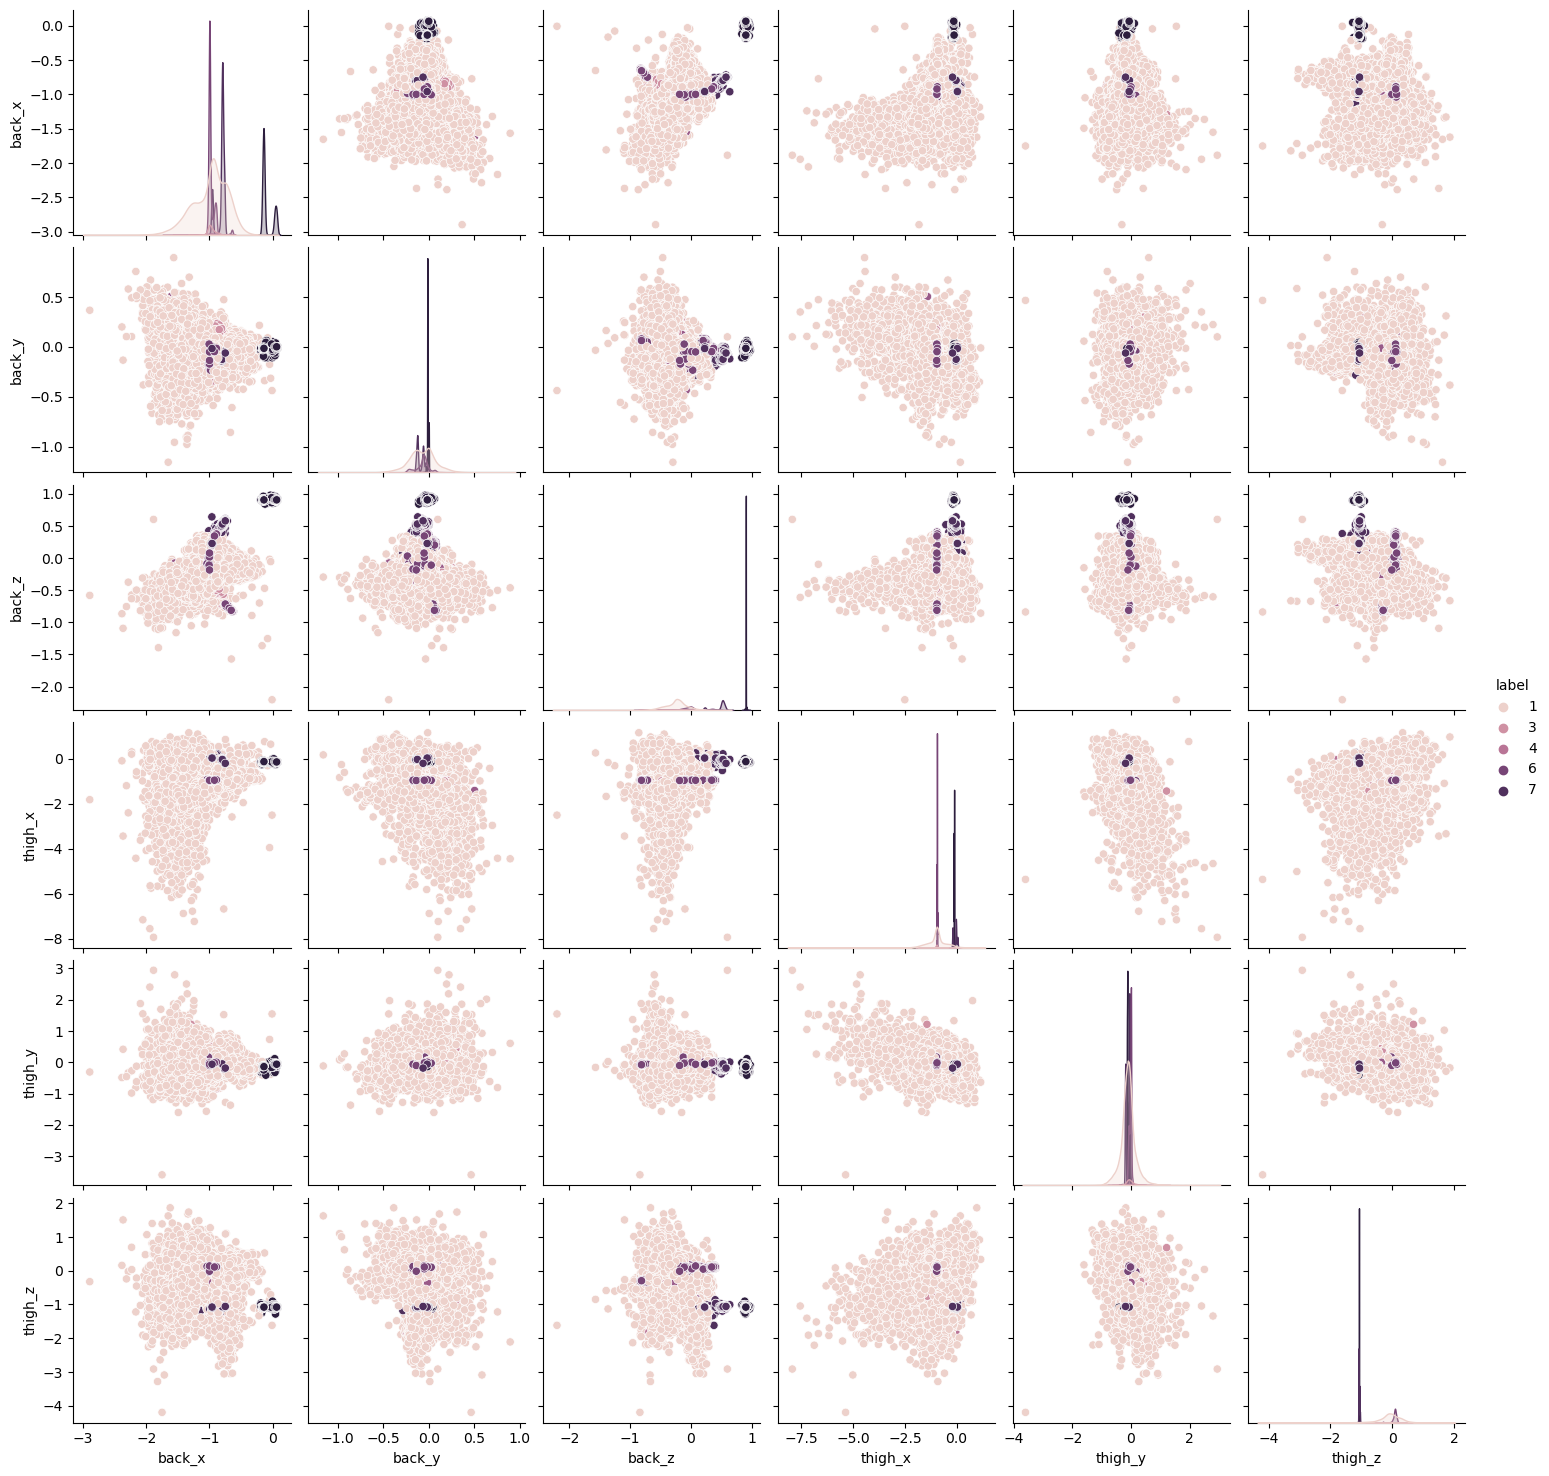

In [21]:
sns.pairplot(data,hue='label')

In [5]:
data = data.sample(frac = 0.5)

In [10]:
X = data.drop(['label', 'timestamp'], axis = 1)

In [11]:
y = data['label']

In [12]:
X_data = X.to_numpy()
y_data = pd.get_dummies(y).values

In [13]:
X_data = X_data.astype('float32')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [16]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (33235, 6)
y train : (33235, 7)
X test : (10386, 6)
y test : (10386, 7)
X val : (8309, 6)
y val : (8309, 7)


In [17]:
# Defining the model 
from keras import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

inputs = Input(shape = (6,))

x = Dense(16,activation='relu')(inputs)
x2 = Dense(16,activation='relu')(x)
x3 = Dense(16, activation = 'relu')(x2)
outputs = Dense(7, activation = 'sigmoid')(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile('rmsprop',
             loss = "categorical_crossentropy",metrics=["accuracy"]
             )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 7)                 119       
                                                                 
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


In [18]:
#fitting the model and predicting 
# fit network
history=model.fit(x=X_train, y=y_train, epochs=100, batch_size= 32 ,validation_data= (X_val,y_val))

Epoch 1/100
1039/1039 [==============================] - 4s 3ms/step - loss: 0.4976 - accuracy: 0.8614 - val_loss: 0.2604 - val_accuracy: 0.9393
Epoch 2/100
1039/1039 [==============================] - 2s 2ms/step - loss: 0.2191 - accuracy: 0.9440 - val_loss: 0.2055 - val_accuracy: 0.9444
Epoch 3/100
1039/1039 [==============================] - 2s 2ms/step - loss: 0.1894 - accuracy: 0.9474 - val_loss: 0.1865 - val_accuracy: 0.9482
Epoch 4/100
1039/1039 [==============================] - 2s 2ms/step - loss: 0.1756 - accuracy: 0.9501 - val_loss: 0.1750 - val_accuracy: 0.9538
Epoch 5/100
1039/1039 [==============================] - 2s 2ms/step - loss: 0.1668 - accuracy: 0.9540 - val_loss: 0.1703 - val_accuracy: 0.9540
Epoch 6/100
1039/1039 [==============================] - 2s 2ms/step - loss: 0.1620 - accuracy: 0.9549 - val_loss: 0.1582 - val_accuracy: 0.9578
Epoch 7/100
1039/1039 [==============================] - 2s 2ms/step - loss: 0.1582 - accuracy: 0.9563 - val_loss: 0.1576 - val_ac

1039/1039 [==============================] - 2s 2ms/step - loss: 0.1337 - accuracy: 0.9627 - val_loss: 0.1453 - val_accuracy: 0.9629
Epoch 58/100
1039/1039 [==============================] - 3s 2ms/step - loss: 0.1339 - accuracy: 0.9628 - val_loss: 0.1487 - val_accuracy: 0.9627
Epoch 59/100
1039/1039 [==============================] - 3s 2ms/step - loss: 0.1325 - accuracy: 0.9626 - val_loss: 0.1437 - val_accuracy: 0.9643
Epoch 60/100
1039/1039 [==============================] - 3s 3ms/step - loss: 0.1335 - accuracy: 0.9625 - val_loss: 0.1637 - val_accuracy: 0.9612
Epoch 61/100
1039/1039 [==============================] - 3s 3ms/step - loss: 0.1333 - accuracy: 0.9629 - val_loss: 0.1442 - val_accuracy: 0.9644
Epoch 62/100
1039/1039 [==============================] - 3s 3ms/step - loss: 0.1329 - accuracy: 0.9628 - val_loss: 0.1566 - val_accuracy: 0.9608
Epoch 63/100
1039/1039 [==============================] - 2s 2ms/step - loss: 0.1332 - accuracy: 0.9622 - val_loss: 0.1496 - val_accuracy

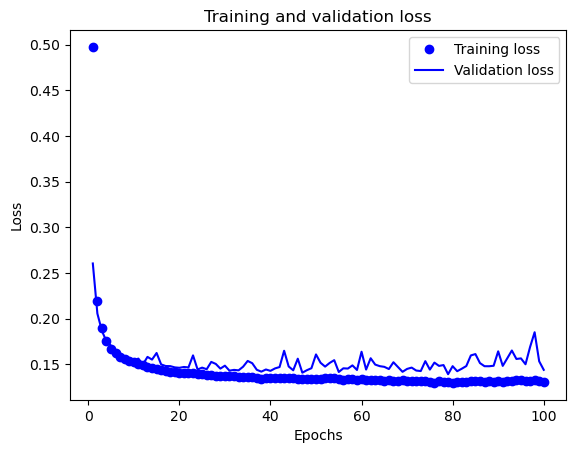

In [19]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

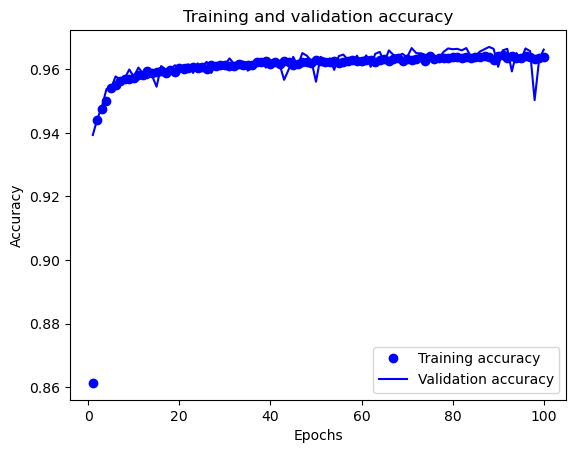

In [20]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [22]:
results = model.evaluate(X_test, y_test)
results

325/325 [==============================] - 1s 2ms/step - loss: 0.1268 - accuracy: 0.9658


[0.12681780755519867, 0.9658193588256836]